# 1) Setup

In [91]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import math
import scipy as sp
from scipy import stats

from copy import copy
import time
import yaml
import pickle
import networkx as nx
import re
import random

import sklearn
from sklearn.cluster import AgglomerativeClustering     #cluster edges
from sklearn.metrics import silhouette_score            #score for clustering
from sklearn.metrics import classification_report       #score for classification
from sklearn.model_selection import GridSearchCV        #cross validate for KDE
from sklearn.model_selection import cross_validate      #cross validate for classification
from sklearn.neighbors import KernelDensity             #KDE for visualisation

#classification algorithms
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

#visualise decision trees
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#Pytorch libraries
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

import pymongo
from pymongo import MongoClient
from datetime import datetime
from datetime import timedelta
print("done")

done


In [1]:
#import functions from python files

#1) draw maps
from draw_graph import *
from draw_graph_tsc import *

#2) Bayesian optimisation of Lognormal model
from Gamma import *
from Lognormal import *
from Gaussian import *
from Gaussian_broadcast import *
from Normal_Gamma import *

from Normal_Gamma_bayes import *
from Normal_Gamma_bayes_maxrange import *
from Normal_Gamma_bayes_nothreshold import *
from Normal_Gamma_bayes_initial import *
from Normal_Gamma_bayes_update import *
from Normal_Gamma_bayes_updateone import *
from Gaussian_ml import *              # for comparison

from select_data import *
from select_data_edge import *

from kde import *
from update_mean import *
from update_var import *

#3) Clustering
from get_context import *
from get_adjacent import *
from get_coords import *

from distances_length import *
from distances_length_subset import *
from distances_connections import *
from distances_connections2 import *
from distances_ks import *
from distances_ks_threshold import *
from distances_square import *
from distances_angle_max import *
from distances_class import *

from underscore_prefix import *
from underscore_suffix import *

from integrate import *
from integrate_trapezium import *
from integrate_simpson import *
from integrate_pdf import *

from calc_length import *
from calc_angle import *

from optimum_clusters import *
from draw_clusters import *
from draw_clusters_tsc import *

from error_ks_2samples import *
from error_square_2samples import *
from compare_edges import *

#4) Classification
from get_length import *
from get_connections import *
from get_origin_target import *
from get_angle_max import *
from get_angle_sum import *

from dataloader6 import *
from dataloader_random import *
from classifier_pointtest import *
from classifier_featureimportance import *
from classifier_comparemethods import *
from classifier_trainonboth import *

#5) regression
from get_features import *

from regression_dataloader import *
from regression_dataloader_nofit import *
from regression_dataloader_square import *
from regressor_pointtest import *
from regressor_nsimilar import *

#6) Threshold-classification
from ks_dataloader import *


#6) Evaluation
from evaluate_groundtruth import *
from evaluate_offset import *

from evaluate_mle import *
from evaluate_mle_ensemble import *
from evaluate_bayes import *
from evaluate_bayes_ensemble import *

from random_prior import *
from specific_prior import *
from evaluate_prior import *
from evaluate_random import *
from evaluate_random_obs import *
from evaluate_random_ensemble import *
from evaluate_random_multiedge import *

from similar_length import *
from evaluate_length import *
from evaluate_length_ensemble import *
from evaluate_length_ensemble_obs import *
from compare_similar import *  #check supposedly similar distributions
from compare_length import *

from similar_classification import *
from evaluate_classification import *
from evaluate_classification_ensemble import *
from evaluate_classification_multiedge import *
from compare_classification import *

from similar_regression import *
from evaluate_regression import *
from evaluate_regression_ensemble import *
from evaluate_regression_multiedge import *
from compare_regression import *

from evaluate_specific_prior import *
from similar_length_fast import *
from start_ks_length import *
from start_ks_random import *
from similar_classification_fast import *
from start_ks_classification import *
from similar_regression_fast import *
from start_ks_regression import *

print("done")

done


In [93]:
#AAF
# retrieve data
df_aaf_y4 = pd.read_excel("data_aaf_y4.xlsx")
df_aaf_y4 = df_aaf_y4[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y3 = pd.read_excel("data_aaf_y3.xlsx")
df_aaf_y3 = df_aaf_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_aaf_y2 = pd.read_excel("data_aaf_y2.xlsx")
df_aaf_y2 = df_aaf_y2[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_aaf_merge = pd.concat([df_aaf_y4, df_aaf_y3, df_aaf_y2])
df_aaf_merge = df_aaf_merge.sample(frac=1).reset_index(drop = True)

#TSC
# retrieve data
df_tsc_bob = pd.read_excel("data_tsc_bob.xlsx")
df_tsc_bob = df_tsc_bob[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_betty = pd.read_excel("data_tsc_betty.xlsx")
df_tsc_betty = df_tsc_betty[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
# retrieve data
df_tsc_y3 = pd.read_excel("data_tsc_y3.xlsx")
df_tsc_y3 = df_tsc_y3[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#merge data
df_tsc_merge = pd.concat([df_tsc_betty, df_tsc_bob, df_tsc_y3])
df_tsc_merge = df_tsc_merge.sample(frac=1).reset_index(drop = True)

#LABS
# retrieve data
df_labs = pd.read_excel("data_labs.xlsx")
df_labs = df_labs[["origin", "target", "edge_id", "time_to_waypoint", "operation_time"]]
#randomise data
df_labs_merge = df_labs.sample(frac=1).reset_index(drop = True)

#BLENHEIM
# retrieve data
df_blenheim_random = pd.read_excel("data_blenheim_random.xlsx")
df_blenheim_random = df_blenheim_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_blenheim_targeted = pd.read_excel("data_blenheim_targeted.xlsx")
df_blenheim_targeted = df_blenheim_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_blenheim_merge = pd.concat([df_blenheim_random,df_blenheim_targeted])
df_blenheim_merge = df_blenheim_merge.sample(frac=1).reset_index(drop = True)

#WALMART
# retrieve data
df_walmart_random = pd.read_excel("data_walmart_random.xlsx")
df_walmart_random = df_walmart_random[["origin", "target", "edge_id", "operation_time"]]
# retrieve data
df_walmart_targeted = pd.read_excel("data_walmart_targeted.xlsx")
df_walmart_targeted = df_walmart_targeted[["origin", "target", "edge_id", "operation_time"]]
#merge data
df_walmart_merge = pd.concat([df_walmart_random,df_walmart_targeted])
df_walmart_merge = df_walmart_merge.sample(frac=1).reset_index(drop = True)

print("done")

done


In [4]:
edge = "WayPoint76_Lift1"
seed = 1
print("edge is defined")

edge is defined


# 2) offset vs edge length

Max speed: 2.609766873886736
Mean: 0.7578050153666741
Std: 0.3539252542929244


Text(0.5, 1.0, 'AAF')

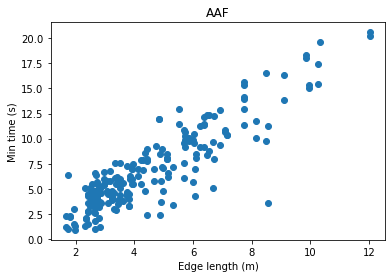

In [28]:
df_offset_aaf = evaluate_offset(df_aaf_merge,filename="aaf_map.yaml",metric="difference", cutoff = 1)
plt.scatter(df_offset_aaf["edge_length"],df_offset_aaf["t_min"])
plt.xlabel("Edge length (m)")
plt.ylabel("Min time (s)")
plt.title("AAF")

Max speed: 2.086449352459007
Mean: 0.5990279662379487
Std: 0.265820745168468
Min speed: 0.06876328969379267


Text(0.5, 1.0, 'TSC')

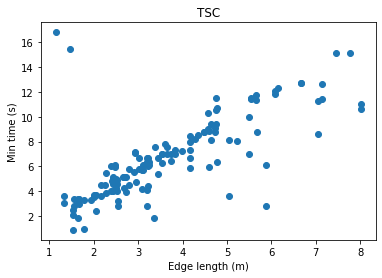

In [29]:
df_offset_tsc = evaluate_offset(df_tsc_merge,filename="tsc_map.yaml",metric="difference", cutoff = 50)
print("Min speed:",df_offset_tsc["max_speed"].min())
plt.scatter(df_offset_tsc["edge_length"],df_offset_tsc["t_min"])
plt.xlabel("Edge length (m)")
plt.ylabel("Min time (s)")
plt.title("TSC")

# 3) "Ground Truth" metric
- KS score for Bayesian & MLE fitting using all data from true edge

### AAF

In [30]:
df_aaf_gt = evaluate_groundtruth(df_aaf_merge, filename = "aaf_map.yaml",metric = "difference", 
                                  cutoff = 1, prior_params = [1,0.1,1,1])

C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5331: RuntimeWarning: invalid value encountered in log
  lambda x, s: -np.log(x)**2 / (2*s**2) - np.log(s*x*np.sqrt(2*np.pi)),


In [31]:
#save to excel
df_aaf_gt.to_excel("groundtruth_aaf.xlsx")
print("done")

done


In [32]:
# retrieve data
df_aaf_gt = pd.read_excel("groundtruth_aaf.xlsx")
df_aaf_gt = df_aaf_gt[["edge_id", "origin", "target","n_obs",
                "ks_bayes","s_bayes","loc_bayes","scale_bayes",
                "ks_mle","s_mle","loc_mle","scale_mle"]]
df_aaf_gt.head(10)

,edge_id,origin,target,n_obs,ks_bayes,s_bayes,loc_bayes,scale_bayes,ks_mle,s_mle,loc_mle,scale_mle
0,WayPoint86_WayPoint90,WayPoint86,WayPoint90,1148,0.398310,0.100000,3.994581,3.320117,0.286844,0.372493,3.817528,4.046184
1,WayPoint87_WayPoint89,WayPoint87,WayPoint89,981,0.180267,0.100000,2.634500,2.339647,0.315036,0.346979,2.496138,2.684932
2,WayPoint89_WayPoint87,WayPoint89,WayPoint87,974,0.187832,0.141421,3.562461,1.433329,0.289546,0.574551,3.535789,1.592533
3,Cafeteria_WayPoint26,Cafeteria,WayPoint26,944,0.121949,0.860233,2.750675,2.664456,0.119189,0.825128,2.720061,2.651560
4,WayPoint50_Lift2,WayPoint50,Lift2,893,0.330292,0.412311,4.656896,3.353485,0.617594,2.562679,4.664087,22.685756
5,Lift2_WayPoint50,Lift2,WayPoint50,890,0.254008,0.632456,4.514932,2.611696,0.250288,0.606494,4.467944,2.632518
6,WayPoint86_WayPoint91,WayPoint86,WayPoint91,871,0.253360,0.655744,10.377217,4.014850,0.209527,0.613897,10.296738,4.415756
7,WayPoint49_WayPoint50,WayPoint49,WayPoint50,847,0.355454,0.685565,3.485321,3.353485,0.405530,0.586271,3.403528,3.194298
8,WayPoint49_Cafeteria,WayPoint49,Cafeteria,842,0.233328,0.600000,4.501388,3.525421,0.221333,0.569152,4.350673,3.617799
9,WayPoint35_Frisoer,WayPoint35,Frisoer,807,0.212127,0.979796,3.642428,3.525421,0.194487,0.871035,3.402201,3.900778


### TSC

In [33]:
df_tsc_gt = evaluate_groundtruth(df_tsc_merge, filename = "tsc_map.yaml",metric = "difference", 
                                  cutoff = 1, prior_params = [1,0.1,1,1])

In [34]:
#save to excel
df_tsc_gt.to_excel("groundtruth_tsc.xlsx")
print("done")

done


In [35]:
# retrieve data
df_tsc_gt = pd.read_excel("groundtruth_tsc.xlsx")
df_tsc_gt = df_tsc_gt[["edge_id", "origin", "target","n_obs",
                "ks_bayes","s_bayes","loc_bayes","scale_bayes",
                "ks_mle","s_mle","loc_mle","scale_mle"]]
df_tsc_gt.head(2)

,edge_id,origin,target,n_obs,ks_bayes,s_bayes,loc_bayes,scale_bayes,ks_mle,s_mle,loc_mle,scale_mle
0,SuppLocker5_SuppLocker7,SuppLocker5,SuppLocker7,502,0.186946,0.883176,10.507887,2.944680,0.192715,0.786886,10.308198,3.236832
1,SuppLocker13_SuppLocker14,SuppLocker13,SuppLocker14,354,0.078011,1.131371,6.342823,5.259311,0.077543,1.087319,6.264804,5.418829


# 4) MLE method
- metric: KS score compared to empirical data
- final metric = KS score of Bayesian fitted data vs empirical data (dotted line)
- Add datapoints 1 by 1 in each method & calculate metric

200 iterations: 0.0992431640625 secs
No. of resets for offset: 1


C:\Users\pyliu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\pyliu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Text(0.5, 1.0, 'MLE fit')

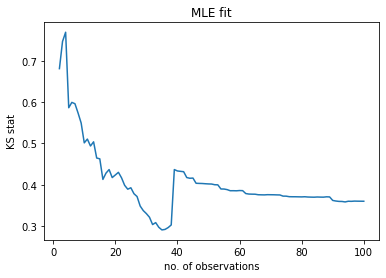

In [93]:
#single run
#edge = "WayPoint87_WayPoint89"
ks_mle, n_mle = evaluate_mle(edge,df_aaf_merge, metric = "difference", verbose = True)
cutoff = 100
plt.plot(n_mle[:cutoff],ks_mle[:cutoff])
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("MLE fit")

5 iterations: 0.43434786796569824 secs
10 iterations: 0.9425616264343262 secs
15 iterations: 1.4328176975250244 secs
20 iterations: 1.937467098236084 secs
Time taken (evaluate_mle_ensemble): 1.937467098236084 secs


Text(0.5, 1.0, 'MLE fit')

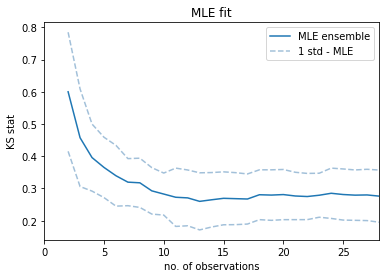

In [94]:
#ensemble method
#edge = "WayPoint87_WayPoint89"
ks_mle_ensemble, n_mle_ensemble, std_mle_ensemble = evaluate_mle_ensemble(edge,df_aaf_merge, 
                                                                          metric = "difference", n_repeats = 20,
                                                                          verbose = True,
                                                                         random_state = seed)

cutoff = len(n_mle_ensemble)//7
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.plot(n_mle_ensemble,ks_mle_ensemble+std_mle_ensemble, 
         linestyle = "dashed", color = "steelblue", alpha = 0.5,label = "1 std - MLE")
plt.plot(n_mle_ensemble,ks_mle_ensemble-std_mle_ensemble, 
         linestyle = "dashed", color = "steelblue", alpha = 0.5)
plt.legend()
plt.xlim([0,cutoff])
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("MLE fit")

# 5) Bayesian method (naive prior)

C:\Users\pyliu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


200 iterations: 2.1500799655914307 secs
No. of resets for offset: 7


Text(0.5, 1.0, 'Bayesian fit (naive)')

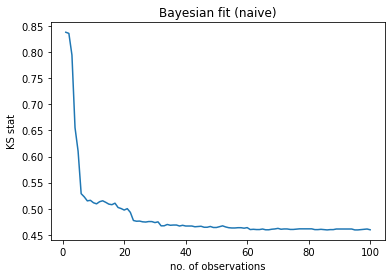

In [95]:
#single run
#edge = "WayPoint87_WayPoint89"
ks_bayes, n_bayes = evaluate_bayes(edge,df_aaf_merge, metric = "difference",
                        prior_params = [1,0.1,1,1], verbose = True,
                        random_state = 1)
cutoff = 100
plt.plot(n_bayes[:cutoff],ks_bayes[:cutoff])
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Bayesian fit (naive)")

2 iterations: 2.2008352279663086 secs
4 iterations: 5.372040748596191 secs
6 iterations: 10.422225713729858 secs
8 iterations: 14.637325048446655 secs
10 iterations: 17.136811017990112 secs
Time taken (evaluate_bayes_ensemble): 17.136811017990112 secs


Text(0.5, 1.0, 'Bayesian fit (naive)')

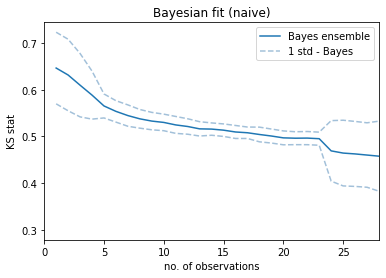

In [96]:
#ensemble method
#edge = "WayPoint87_WayPoint89"
ks_bayes_ensemble, n_bayes_ensemble, std_bayes_ensemble = evaluate_bayes_ensemble(edge,df_aaf_merge, metric = "difference",
                        prior_params = [1,0.1,1,1],n_repeats = 10, verbose = True,random_state = seed)

cutoff = len(n_bayes_ensemble)//7
plt.plot(n_bayes_ensemble,ks_bayes_ensemble, label = "Bayes ensemble")
plt.plot(n_bayes_ensemble,ks_bayes_ensemble+std_bayes_ensemble, 
         linestyle = "dashed", color = "steelblue", alpha = 0.5,label = "1 std - Bayes")
plt.plot(n_bayes_ensemble,ks_bayes_ensemble-std_bayes_ensemble, 
         linestyle = "dashed", color = "steelblue", alpha = 0.5)
plt.legend()
plt.xlim([0,cutoff])
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Bayesian fit (naive)")

# 6) Random edge

Text(0.5, 1.0, 'Random edge')

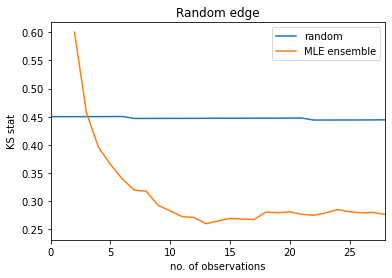

In [97]:
#edge = "WayPoint87_WayPoint89"
ks_random, n_random = evaluate_random(edge,df_test = df_aaf_merge, 
                                      df_train = df_tsc_merge, 
                                      filename_train = "tsc_map.yaml",
                    metric = "difference", cutoff=100, max_obs = 1000,
                    plot_graph = False, verbose = False,
                                     random_state = seed)

cutoff = len(n_random)//7
plt.plot(n_random,ks_random, label = "random")
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Random edge")


Text(0.5, 1.0, 'Random edge')

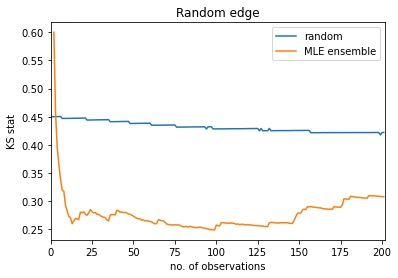

In [98]:
cutoff = len(n_random)
plt.plot(n_random,ks_random, label = "random")
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Random edge")


### ensemble

Time taken (evaluate_random_ensemble): 89.60688972473145 secs


Text(0.5, 1.0, 'Random edge')

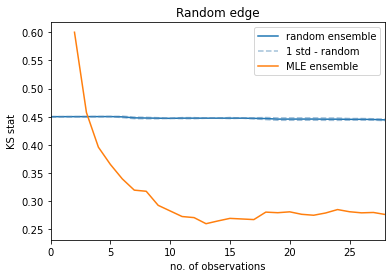

In [99]:
#edge = "WayPoint87_WayPoint89"
ks_random_ensemble, n_random_ensemble, std_random_ensemble = evaluate_random_ensemble(edge,df_test = df_aaf_merge, 
                                      df_train = df_tsc_merge, 
                                      filename_train = "tsc_map.yaml",n_repeats = 10,
                    metric = "difference", cutoff=100, max_obs = 1000,
                    plot_graph = False, verbose = False,
                    random_state = seed)

cutoff = len(n_random_ensemble)//7
plt.plot(n_random_ensemble,ks_random_ensemble, label = "random ensemble")
plt.plot(n_random_ensemble,ks_random_ensemble+std_random_ensemble, 
         color = "steelblue",linestyle = "dashed", alpha = 0.5, label = "1 std - random")
plt.plot(n_random_ensemble,ks_random_ensemble-std_random_ensemble, 
         color = "steelblue",linestyle = "dashed", alpha = 0.5)
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Random edge")


### multiedge

C:\Users\pyliu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Time taken (evaluate_random_ensemble): 60.93156433105469 secs


Text(0.5, 1.0, 'Random edge')

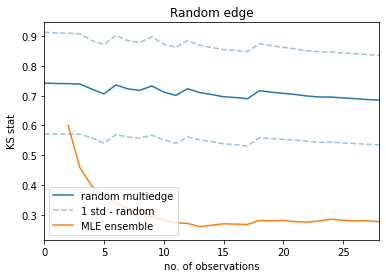

In [100]:
#edge = "WayPoint87_WayPoint89"
ks_random_multiedge, n_random_multiedge, std_random_multiedge = evaluate_random_multiedge(edge,df_test = df_aaf_merge, 
                                      df_train = df_tsc_merge, 
                                      filename_train = "tsc_map.yaml",n_repeats = 10,
                    metric = "difference", cutoff=100, max_obs = 1000,
                    plot_graph = False, verbose = False,
                    random_state = seed)

cutoff = len(n_random_multiedge)//7
plt.plot(n_random_multiedge,ks_random_multiedge, label = "random multiedge")
plt.plot(n_random_multiedge,ks_random_multiedge+std_random_multiedge, 
         color = "steelblue",linestyle = "dashed", alpha = 0.5, label = "1 std - random")
plt.plot(n_random_multiedge,ks_random_multiedge-std_random_multiedge, 
         color = "steelblue",linestyle = "dashed", alpha = 0.5)
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Random edge")


### different max_obs

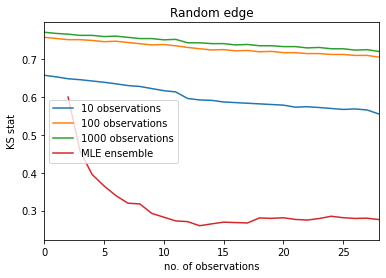

In [101]:
#edge = "WayPoint87_WayPoint89"
max_obs = [10,100,1000]
ks_dict, n_random = evaluate_random_obs(edge,df_test = df_aaf_merge, 
                                      df_train = df_tsc_merge, 
                                      filename_train = "tsc_map.yaml",
                    metric = "difference", cutoff=100, max_obs = max_obs,
                    plot_graph = False, verbose = False,
                    random_state = seed)

cutoff = len(n_random)//7
for i in range(len(ks_dict)):
    label = str(max_obs[i]) + " observations"
    plt.plot(n_random,ks_dict[str(max_obs[i])], label = label)
    
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Random edge")
plt.legend()

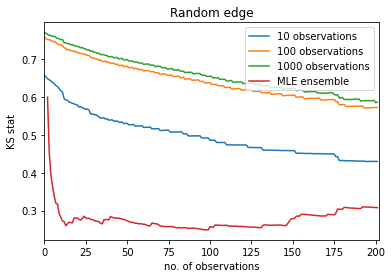

In [102]:
max_obs = [10,100,1000]
cutoff = len(n_random)
for i in range(len(ks_dict)):
    label = str(max_obs[i]) + " observations"
    plt.plot(n_random,ks_dict[str(max_obs[i])], label = label)
    
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Random edge")
plt.legend()

# 7) Most similar edge length

In [103]:
#edge = "WayPoint87_WayPoint89"

similar_edges,length_diff = similar_length(edge, filename_test = "aaf_map.yaml", filename_train = "tsc_map.yaml", n_similar=10)
edge_prior = similar_edges[0]
print(edge_prior, length_diff[0])
print(similar_edges)

CorpLocker1_CorpLocker5 0.10166207851098186
['CorpLocker1_CorpLocker5', 'CorpLocker7_CorpLocker6', 'CorpLocker6_CorpLocker7', 'KitchenActRec1_NewArea1', 'CorpLocker5_CorpLocker1', 'NewArea1_KitchenActRec1', 'CorpActRec3_Quasi1', 'SuppLocker11_SuppMeetingPod1', 'Quasi1_CorpActRec3', 'SuppMeetingPod1_SuppLocker11']


Similar edge: CorpLocker7_CorpLocker6
length diff: 0.09052959633793556
n_obs: 182


Text(0.5, 1.0, 'Most similar edge length')

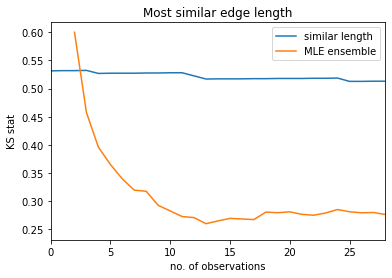

In [104]:
#edge = "WayPoint87_WayPoint89"
ks_length, n_length = evaluate_length(edge,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    metric = "difference", 
                    cutoff = 100,max_obs = 100,
                    plot_graph = False, verbose = False,
                    random_state = seed)
cutoff = len(n_length)//7
plt.plot(n_length,ks_length, label = "similar length")
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Most similar edge length")

Text(0.5, 1.0, 'Most similar edge length')

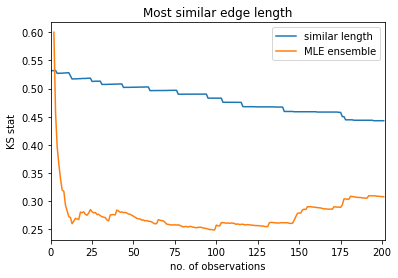

In [105]:
cutoff = len(n_length)
plt.plot(n_length,ks_length, label = "similar length")
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Most similar edge length")

### ensemble

Similar edge: CorpLocker7_CorpLocker6
length diff: 0.09052959633793556
n_obs: 182
Time taken (evaluate_length_ensemble): 53.199772357940674 secs


Text(0.5, 1.0, 'Most similar edge length')

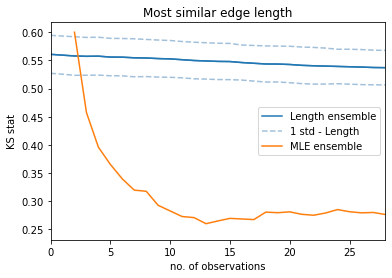

In [106]:
#edge = "WayPoint87_WayPoint89"
ks_length_ensemble, n_length_ensemble, std_length_ensemble = evaluate_length_ensemble(edge,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    n_repeats = 10,cutoff = 50,
                    metric = "difference", max_obs = 100,
                    plot_graph = False, verbose = False,
                    random_state = seed)

cutoff = len(n_length_ensemble)//7
plt.plot(n_length_ensemble,ks_length_ensemble, color = "steelblue")
plt.plot(n_length_ensemble,ks_length_ensemble, label = "Length ensemble")
plt.plot(n_length_ensemble,ks_length_ensemble+std_length_ensemble, 
         linestyle = "dashed", color = "steelblue", alpha = 0.5,label = "1 std - Length")
plt.plot(n_length_ensemble,ks_length_ensemble-std_length_ensemble, 
         linestyle = "dashed", color = "steelblue", alpha = 0.5)

plt.plot(n_mle_ensemble, ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Most similar edge length")

Text(0.5, 1.0, 'Most similar edge length')

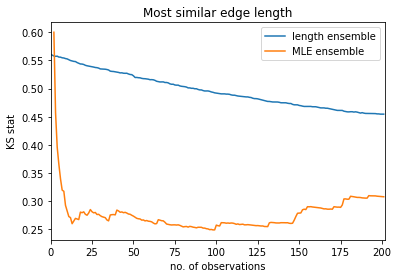

In [107]:
cutoff = len(n_length)
plt.plot(n_length_ensemble,ks_length_ensemble, label = "length ensemble")
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Most similar edge length")

### different max_obs + ensemble

Similar edge: CorpLocker7_CorpLocker6
length diff: 0.09052959633793556
n_obs: 182
Time taken (evaluate_length_ensemble): 39.1761736869812 secs
Similar edge: CorpLocker7_CorpLocker6
length diff: 0.09052959633793556
n_obs: 182
Time taken (evaluate_length_ensemble): 53.24786114692688 secs
Similar edge: CorpLocker7_CorpLocker6
length diff: 0.09052959633793556
n_obs: 182
Time taken (evaluate_length_ensemble): 66.85210180282593 secs


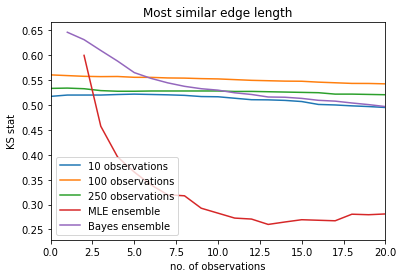

In [108]:
#edge = "WayPoint87_WayPoint89"
max_obs = [10,100,250]
ks_length_dict, n_length = evaluate_length_ensemble_obs(edge,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    n_repeats = 10,cutoff=50,
                    metric = "difference",
                    max_obs = max_obs,
                    plot_graph = False, verbose = False,
                    random_state = seed)

cutoff = len(n_length)//10
for i in range(len(ks_length_dict)):
    label = str(max_obs[i]) + " observations"
    plt.plot(n_length,ks_length_dict[str(max_obs[i])], label = label)
    
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.plot(n_bayes_ensemble,ks_bayes_ensemble, label = "Bayes ensemble")
plt.xlim([0,cutoff])
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Most similar edge length")
plt.legend()

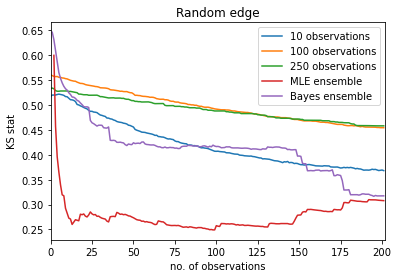

In [109]:
cutoff = len(n_length)
for i in range(len(ks_length_dict)):
    label = str(max_obs[i]) + " observations"
    plt.plot(n_length,ks_length_dict[str(max_obs[i])], label = label)
    
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.plot(n_bayes_ensemble,ks_bayes_ensemble, label = "Bayes ensemble")
plt.xlim([0,cutoff])
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Random edge")
plt.legend()

### check distributions

Similar edge: CorpLocker7_CorpLocker6
length diff: 0.09052959633793556
n_obs: 182
n_test: 201
n_train: 182
KS: 0.7323273741184189


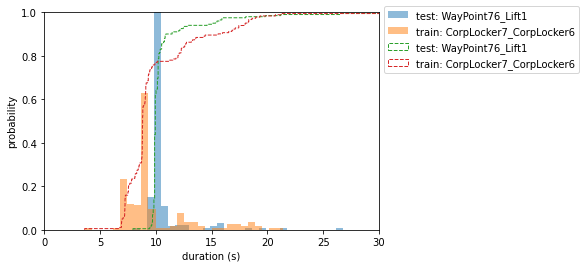

In [53]:
#edge = "WayPoint76_Lift1"
ks = compare_length(edge, 
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test= "aaf_map.yaml",
                    filename_train = "tsc_map.yaml", 
                    n_similar=5,cutoff = 40,
                    metric = "difference", x_max = 30, 
                    n_bins_test = 200, n_bins_train = 50)


# 8) Clustering + Classifier

## 8a) Clustering on Training map

In [2]:
#train map
threshold_matrix_tsc, threshold_edges_tsc, lone_edges_tsc = distances_ks_threshold(df_tsc_merge, metric = "difference", cutoff = 20, threshold = 0.3)
print(len(threshold_matrix_tsc), len(lone_edges_tsc))

NameError: name 'df_train' is not defined

Optimum no. of clusters: 6
Max silhouette coeff: 0.2560867329196152


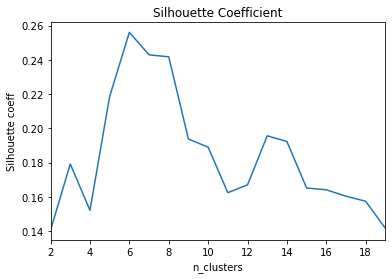

In [95]:
n_clusters, s_list = optimum_clusters(threshold_matrix_tsc, max_clusters = 20, method = "ss", linkage = "average")

In [96]:
clustering = AgglomerativeClustering(n_clusters=6, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( threshold_matrix_tsc )
print(labels)
threshold_clusters_tsc = pd.DataFrame(index = np.arange(len(threshold_edges_tsc)),columns = ["edge_id", "cluster_id"])
threshold_clusters_tsc["edge_id"] = threshold_edges_tsc
threshold_clusters_tsc["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[0 1 2 2 2 2 2 3 1 2 2 1 1 0 1 1 2 1 2 2 2 2 2 5 2 2 2 2 0 0 5 2 4 1 5 5 5
 2 5 2 2 1 2 5 5 2 2 2 0 0 5 1 0 1 5 0 5 5 2 5 4 0 5 2 0 0 2 4 5 1 2 1 1 0
 2 1 1 5 2 1 0 1 0 2 5 2 2 2 2 2 0 2 2 2 0 1 2 1 0 2 1 1 1 5 2 2 1 5 1 3 2
 2 5 1 2 1 1 1 1 1 2 5 0 0 5 1 1 1 2 2 1 1 2 2 2 5 2 2 1 5 2 2 1 5 5 1 1 2
 1 2 2 2 2 5 5 1 2 5 5 2 5 1 1 1 1 2 1 1 5 2 2 0 0 2 2 5 2 2 1 2 2]
6 clusters


no. of edges: 249
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
Edges without enough data are black


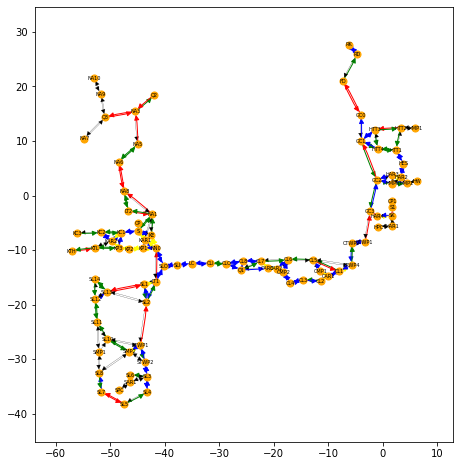

In [17]:
G = draw_clusters_tsc("tsc_map.yaml", threshold_clusters_tsc, size = 2, rotate = False)
plt.savefig("clusters_threshold_tsc.png", dpi = 1000, bbox_inches = "tight")

## 8b) Clustering on Test Map (for validation in 8c)

In [17]:
#test map
threshold_matrix_aaf, threshold_edges_aaf, lone_edges_aaf = distances_ks_threshold(df_aaf_merge, metric = "difference", cutoff = 20, threshold = 0.3)
print(len(threshold_matrix_aaf), len(lone_edges_aaf))

0 edges: 0.03889656066894531 secs
20 edges: 25.35608220100403 secs
40 edges: 43.90307092666626 secs
60 edges: 59.16633367538452 secs
80 edges: 72.59096097946167 secs
100 edges: 84.93374562263489 secs
120 edges: 96.36037039756775 secs
140 edges: 107.48293399810791 secs
160 edges: 118.33739352226257 secs
180 edges: 126.33883166313171 secs
200 edges: 126.35877823829651 secs
Time taken: 126.3687515258789 secs
160 15


Optimum no. of clusters: 8
Max silhouette coeff: 0.3474161428338446


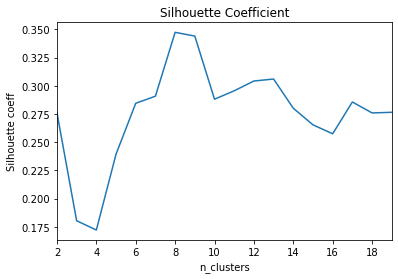

In [18]:
n_clusters, s_list = optimum_clusters(threshold_matrix_aaf, max_clusters = 20, method = "ss", linkage = "average")

In [19]:
clustering = AgglomerativeClustering(n_clusters=8, affinity='precomputed', linkage = 'average')
labels = clustering.fit_predict( threshold_matrix_aaf )
print(labels)
threshold_clusters_aaf = pd.DataFrame(index = np.arange(len(threshold_edges_aaf)),columns = ["edge_id", "cluster_id"])
threshold_clusters_aaf["edge_id"] = threshold_edges_aaf
threshold_clusters_aaf["cluster_id"] = labels
print(np.max(labels) + 1, "clusters")

[1 4 4 4 1 1 5 1 1 1 3 3 4 1 4 4 1 1 1 3 5 1 1 4 1 1 1 1 3 4 1 4 1 3 3 3 1
 1 3 0 0 1 1 0 1 0 3 3 5 1 1 5 1 4 3 3 0 2 3 1 1 1 1 1 2 1 3 0 2 1 1 0 1 3
 7 3 0 1 1 0 0 2 0 1 0 0 0 7 4 1 0 1 1 5 0 4 4 4 1 4 1 4 4 1 1 0 3 1 5 4 4
 5 3 1 1 0 1 0 5 3 6 5 3 4 5 4 5 1 1 0 1 0 4 4 4 1 0 4 5 4 0 3 1 1 3 3 1 4
 1 1 0 6 1 1 0 5 0 5 1 3]
8 clusters


no. of edges: 220
CLuster 0 has colour code: r
CLuster 1 has colour code: g
CLuster 2 has colour code: b
CLuster 3 has colour code: c
CLuster 4 has colour code: m
CLuster 5 has colour code: yellow
CLuster 6 has colour code: orange
CLuster 7 has colour code: purple
Edges without enough data are black


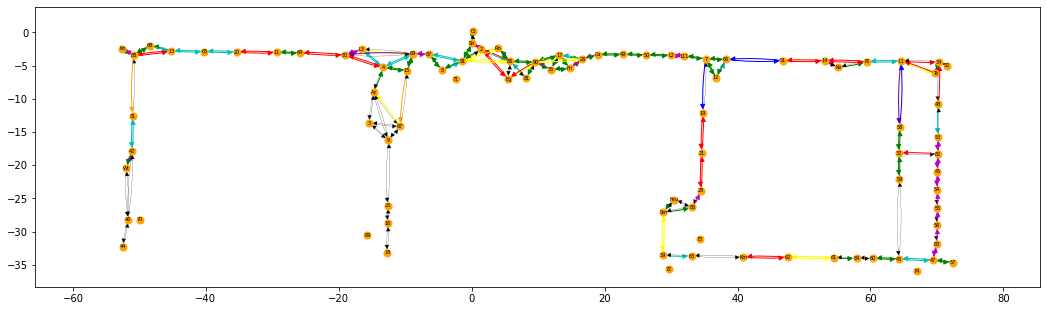

In [21]:
G = draw_clusters("aaf_map.yaml", threshold_clusters_aaf, size = 3, rotate = True)
plt.savefig("clusters_threshold_aaf.png", dpi = 1000, bbox_inches = "tight")

## 8c) Train Binary Classifier

In [20]:
#Load data into binary label format
#training map
df_class_diff_tsc = dataloader6(threshold_clusters_tsc, filename = "tsc_map.yaml")
#testing map
df_class_diff_aaf = dataloader6(threshold_clusters_aaf, filename = "aaf_map.yaml")

Time taken (dataloader6): 18.974284410476685 secs
Time taken (dataloader6): 15.269663572311401 secs


Samples drawn: 9092
Samples drawn: 12720
Classifier type: gb
Accuracy: 0.7818396226415094
              precision    recall  f1-score   support

         0.0       0.93      0.77      0.85      9839
         1.0       0.51      0.81      0.63      2881

    accuracy                           0.78     12720
   macro avg       0.72      0.79      0.74     12720
weighted avg       0.84      0.78      0.80     12720



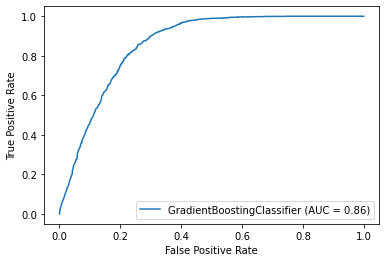

In [21]:
#point test - can choose classifier
#from ["rf", "dt", "knn", "lr", "svm",  
#      "gb", "ab", "nb", "qda"]
classifier = "gb"
clf_tsc = classifier_pointtest(df_class_diff_tsc, df_class_diff_aaf,
                               features = ["edge_length_diff", "origin_connections_diff", 
                                "target_connections_diff", "total_connections_diff", 
                                "max_angle_diff", "sum_angle_diff"], 
                                target = "same_cluster",
                               classifier = classifier,balanced_train = True, balanced_test = False)

Samples drawn: 5762
Samples drawn: 16290
Classifier type: gb
Accuracy: 0.6373848987108656
              precision    recall  f1-score   support

         0.0       0.89      0.57      0.69     11744
         1.0       0.42      0.81      0.56      4546

    accuracy                           0.64     16290
   macro avg       0.65      0.69      0.62     16290
weighted avg       0.76      0.64      0.66     16290



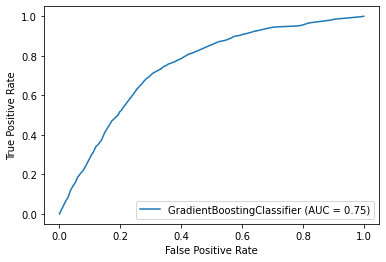

In [97]:
#CLASSIFIER IN REVERSE
#Test on TSC, Train on AAF
#point test - can choose classifier
#from ["rf", "dt", "knn", "lr", "svm",  
#      "gb", "ab", "nb", "qda"]
classifier = "gb"
clf_aaf = classifier_pointtest(df_class_diff_aaf, df_class_diff_tsc,
                               features = ["edge_length_diff", "origin_connections_diff", 
                                "target_connections_diff", "total_connections_diff", 
                                "max_angle_diff", "sum_angle_diff"], 
                                target = "same_cluster",
                               classifier = classifier,balanced_train = True, balanced_test = False)

Samples drawn: 9092
Samples drawn: 5762
1000 datapoints: 0.8533961772918701 secs
2000 datapoints: 1.9634876251220703 secs
3000 datapoints: 3.419499397277832 secs
4000 datapoints: 5.280519962310791 secs
5000 datapoints: 7.506635904312134 secs
6000 datapoints: 10.252459526062012 secs
7000 datapoints: 13.488665342330933 secs
8000 datapoints: 17.33550763130188 secs
9000 datapoints: 22.11954355239868 secs
Time taken: 22.120540857315063 secs
0.7910447761194029


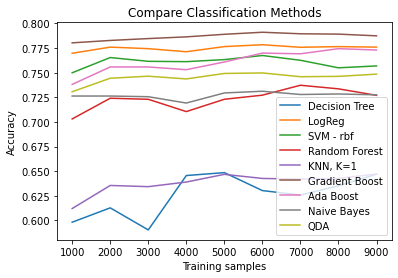

In [64]:
#compare different classifiers
accuracy = classifier_comparemethods(df_class_diff_tsc,df_class_diff_aaf,balanced = True, n_iter = 1, step_size = 1000)

Samples drawn: 9092
edge_length_diff           0.423313
sum_angle_diff             0.233978
max_angle_diff             0.233181
total_connections_diff     0.044873
origin_connections_diff    0.034947
target_connections_diff    0.029708
dtype: float64


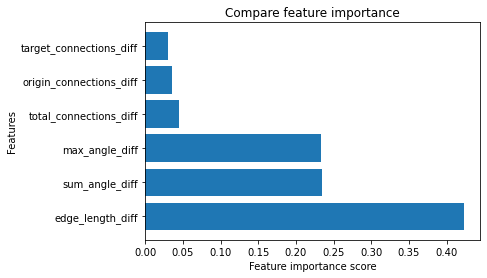

In [65]:
importance = classifier_featureimportance(df_class_diff_tsc, balanced = True)

## 8d) Choose edge & evaluate performance

In [66]:
#edge = "WayPoint49_WayPoint50"
similar_edges, df_predict = similar_classification(edge, clf = clf_tsc, 
                           filename_test = "aaf_map.yaml", filename_train = "tsc_map.yaml", 
                           n_similar = 5)
df_predict.head(5)

,edge_test,edge_train,class_label,class0_prob,class1_prob,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
0,WayPoint76_Lift1,GlassCorridor0_GlassCorridor1,1.0,0.247313,0.752687,0.353621,1,0,1,0.307158,1.63644
1,WayPoint76_Lift1,CorpActRec3_Quasi1,1.0,0.257653,0.742347,0.254197,0,0,0,0.404936,3.07535
2,WayPoint76_Lift1,CorpLocker1_CorpLocker5,1.0,0.266424,0.733576,0.101662,0,0,0,0.350757,3.80271
3,WayPoint76_Lift1,CorpLocker5_CorpLocker1,1.0,0.268718,0.731282,0.101662,1,1,0,0.803828,4.28128
4,WayPoint76_Lift1,NewArea7_Quasi3,1.0,0.272115,0.727885,0.335374,2,1,3,0.566591,2.68508


Similar edge: GlassCorridor0_GlassCorridor1
length diff: 0.3536210733127376
n_obs: 62


C:\Users\pyliu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Clustering-Classifier')

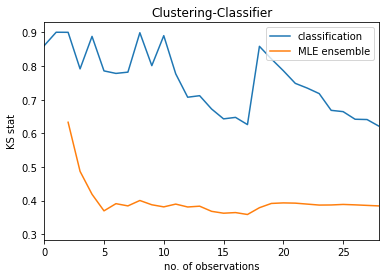

In [67]:
#edge = "WayPoint49_WayPoint50"
ks_classification, n_classification = evaluate_classification(edge,clf=clf_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    metric = "difference", 
                    cutoff = 100,max_obs = 100,n_similar = 10,
                    plot_graph = False, verbose = False)
cutoff = len(n_classification)//7
plt.plot(n_classification,ks_classification, label = "classification")
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Clustering-Classifier")

### ensemble

Similar edge: GlassCorridor0_GlassCorridor1
length diff: 0.3536210733127376
n_obs: 62


C:\Users\pyliu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Time taken (evaluate_classification_ensemble): 40.3984477519989 secs


Text(0.5, 1.0, 'Clustering-Classifier')

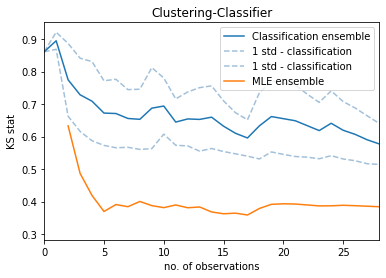

In [68]:
#edge = "WayPoint49_WayPoint50"
ks_classification_ensemble, n_classification_ensemble, std_classification_ensemble = evaluate_classification_ensemble(edge,clf=clf_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    metric = "difference", n_repeats = 10,
                    cutoff = 100,max_obs = 100,n_similar = 10,
                    plot_graph = False, verbose = False,
                    random_state = seed)

cutoff = len(n_classification_ensemble)//7
plt.plot(n_classification_ensemble,ks_classification_ensemble, label = "Classification ensemble")
plt.plot(n_classification_ensemble,ks_classification_ensemble+std_classification_ensemble, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5, label = "1 std - classification")
plt.plot(n_classification_ensemble,ks_classification_ensemble-std_classification_ensemble, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5, label = "1 std - classification")

plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Clustering-Classifier")

### multiedge

Similar edges: ['GlassCorridor3_GlassCorridor2', 'CorpLocker6_CorpLocker7', 'CorpLocker7_CorpLocker6', 'SuppLocker5_SuppLocker7', 'SuppLocker7_SuppLocker5']
n_obs: [166, 174, 182, 502, 145]
Time taken (evaluate_classification_multiedge): 35.14041209220886 secs


Text(0.5, 1.0, 'Clustering-Classifier')

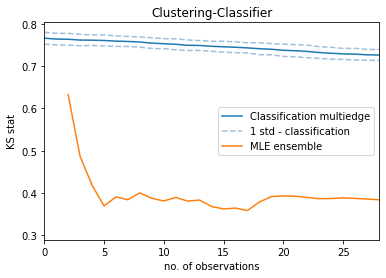

In [69]:
#edge = "WayPoint49_WayPoint50"
ks_classification_multiedge, n_classification_multiedge,std_classification_multiedge = evaluate_classification_multiedge(edge,clf=clf_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    metric = "difference",
                    cutoff = 100,max_obs = 100,n_similar = 20,
                    plot_graph = False, verbose = False,
                    random_state = seed)

cutoff = len(n_classification_multiedge)//7
plt.plot(n_classification_multiedge,ks_classification_multiedge, label = "Classification multiedge")
plt.plot(n_classification_multiedge,ks_classification_multiedge+std_classification_multiedge, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5, label = "1 std - classification")
plt.plot(n_classification_multiedge,ks_classification_multiedge-std_classification_multiedge, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5)

plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Clustering-Classifier")

Text(0.5, 1.0, 'Clustering-Classifier')

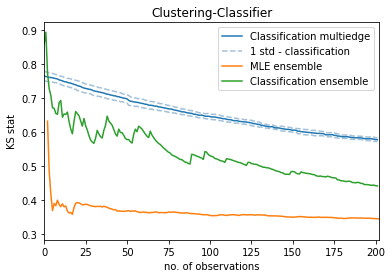

In [70]:
cutoff = len(n_classification_multiedge)
plt.plot(n_classification_multiedge,ks_classification_multiedge, label = "Classification multiedge")
plt.plot(n_classification_multiedge,ks_classification_multiedge+std_classification_multiedge, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5, label = "1 std - classification")
plt.plot(n_classification_multiedge,ks_classification_multiedge-std_classification_multiedge, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5)
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.plot(n_classification_ensemble,ks_classification_ensemble, label = "Classification ensemble")

plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Clustering-Classifier")

### check distributions

Similar edge: GlassCorridor0_GlassCorridor1
length diff: 0.3536210733127376
n_obs: 62
n_test: 201
n_train: 91
KS: 0.8606965174129353


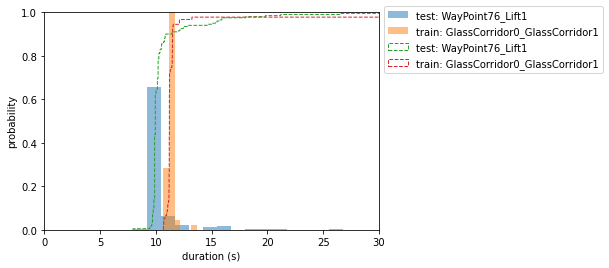

In [71]:
#edge = "WayPoint49_WayPoint50"
ks = compare_classification(edge,clf = clf_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test= "aaf_map.yaml",
                    filename_train = "tsc_map.yaml", 
                    n_similar=10,cutoff = 100,
                    metric = "difference", x_max = 30, 
                    n_bins_test = 100, n_bins_train = 50)


# 9) KS Regression

## 9a) KS Dataloader

In [5]:
#Train map
df_ks_diff_tsc = regression_dataloader_nofit(df_tsc_merge, filename = "tsc_map.yaml",metric = "difference",
                                             cutoff = 50, verbose = True, report_interval = 5000)
df_ks_diff_tsc.tail(2)

5000 iterations: 15.907427549362183 secs
10000 iterations: 23.81361436843872 secs
15000 iterations: 29.972086906433105 secs
20000 iterations: 34.75529861450195 secs
25000 iterations: 38.3118097782135 secs
30000 iterations: 40.80863332748413 secs
Time taken (regression_dataloader): 42.526543617248535 secs


,edge1,edge2,n_obs1,n_obs2,ks,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
8731,CorpLocker3_CorpLocker2,HospEmptySpace_HospTriangularTable1,55,50,0.46,0.464493,0,1,1,0.038271,2.0553
8732,CorpLocker3_CorpLocker2,HospTriangularTable2_HospTriangularTable1,55,50,0.545455,0.917853,1,1,2,0.038271,1.67815


In [6]:
#Test map
df_ks_diff_aaf = regression_dataloader_nofit(df_aaf_merge, filename = "aaf_map.yaml",metric = "difference",cutoff = 50, verbose = True, report_interval = 5000)
df_ks_diff_aaf.tail(2)

5000 iterations: 29.779228448867798 secs
10000 iterations: 44.168235301971436 secs
15000 iterations: 53.374939918518066 secs
Time taken (regression_dataloader): 71.86812925338745 secs


,edge1,edge2,n_obs1,n_obs2,ks,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
8994,WayPoint8_WayPoint87,WayPoint45_WayPoint82,83,50,0.795663,0.439063,0,0,0,0.846232,1.71891
8995,WayPoint8_WayPoint87,Lift1_Teekueche,83,50,0.927711,2.43624,2,1,1,0.751287,1.44086


## 9b) Train KS Regressor

In [7]:
#Valid classifiers = ["ols", "rf", "gb, "ab", "svr"]
reg_tsc = regressor_pointtest(df_train = df_ks_diff_tsc, 
                              df_test = df_ks_diff_aaf,
            features = ["edge_length_diff", "origin_connections_diff", 
            "target_connections_diff", "total_connections_diff", 
            "max_angle_diff", "sum_angle_diff"], 
            target = "ks",
            classifier= "rf")

MSE: 0.027623406121940905
MAE: 0.12552548802679134
Max/min y_pred: 0.9909069730989376 0.3650304058683826
Max/min y_test: 1.0 0.03984795692112765


In [98]:
#TRAIN REGRESSOR IN REVERSE
#Test on TSC, Train on AAF
#Valid classifiers = ["ols", "rf", "gb, "ab", "svr"]
reg_aaf = regressor_pointtest(df_train = df_ks_diff_aaf, 
                              df_test = df_ks_diff_tsc,
            features = ["edge_length_diff", "origin_connections_diff", 
            "target_connections_diff", "total_connections_diff", 
            "max_angle_diff", "sum_angle_diff"], 
            target = "ks",
            classifier= "rf")

MSE: 0.03670381915529499
MAE: 0.14312279068564887
Max/min y_pred: 0.9895678142630014 0.3001025077867085
Max/min y_test: 1.0 0.07495187857237316


## 9c) Choose edge & evaluate performance

In [125]:
#edge = "WayPoint49_WayPoint50"
similar_edges, df_predict_reg = similar_regression(edge, clf = reg_tsc, 
                           filename_test = "aaf_map.yaml", filename_train = "tsc_map.yaml", 
                           n_similar = 1)
df_predict_reg.head(5)

,edge_test,edge_train,ks,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
0,WayPoint76_Lift1,CorpLocker5_CorpLocker6,0.470790,0.5298,1,0,1,0.0240263,0.0556295
1,WayPoint76_Lift1,NewArea6_NewArea8,0.479783,0.41996,1,1,2,0.0277527,1.83616
2,WayPoint76_Lift1,HospTriangularTable3_HospTriangularTable2,0.482149,0.371362,0,1,1,0.0410698,3.04287
3,WayPoint76_Lift1,CorpLocker5_CorpLocker1,0.484645,0.101662,1,1,0,0.803828,4.28128
4,WayPoint76_Lift1,CorpLocker6_CorpLocker7,0.493224,0.0905296,1,0,1,0.0190147,0.710458


Similar edge: CorpLocker5_CorpLocker6
length diff: 0.5298004712792821
n_obs: 242


C:\Users\pyliu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Clustering-Classifier')

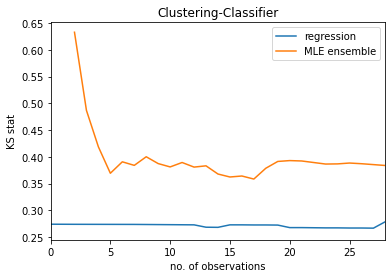

In [76]:
#edge = "WayPoint49_WayPoint50"
ks_regression, n_regression = evaluate_regression(edge,clf=reg_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    metric = "difference", 
                    cutoff = 100,max_obs = 100,n_similar = 10,
                    plot_graph = False, verbose = False)
cutoff = len(n_regression)//7
plt.plot(n_regression,ks_regression, label = "regression")
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Clustering-Classifier")

### ensemble

Similar edge: CorpLocker5_CorpLocker6
length diff: 0.5298004712792821
n_obs: 242


C:\Users\pyliu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Time taken (evaluate_regression_ensemble): 56.379985332489014 secs


Text(0.5, 1.0, 'KS regression')

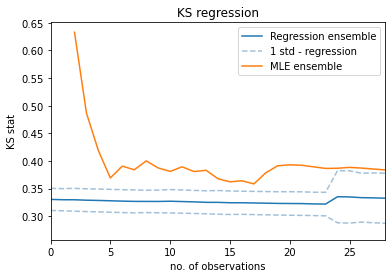

In [77]:
#edge = "WayPoint49_WayPoint50"
ks_regression_ensemble, n_regression_ensemble, std_regression_ensemble = evaluate_regression_ensemble(edge,clf=reg_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    metric = "difference", n_repeats = 10,
                    cutoff = 100,max_obs = 100,n_similar = 10,
                    plot_graph = False, verbose = False,
                    random_state = seed)

cutoff = len(n_regression_ensemble)//7
plt.plot(n_regression_ensemble,ks_regression_ensemble, label = "Regression ensemble")
plt.plot(n_regression_ensemble,ks_regression_ensemble+std_regression_ensemble, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5, label = "1 std - regression")
plt.plot(n_regression_ensemble,ks_regression_ensemble-std_regression_ensemble, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5)

plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("KS regression")

### multiedge

Similar edges: ['CorpLocker5_CorpLocker6', 'CorpLocker6_CorpLocker7', 'CorpLocker6_CorpLocker5', 'CorpTransWP2_CorpTransWP4']
n_obs: [242, 174, 221, 176]


C:\Users\pyliu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Time taken (evaluate_regression_multiedge): 28.262110471725464 secs


Text(0.5, 1.0, 'KS Regression')

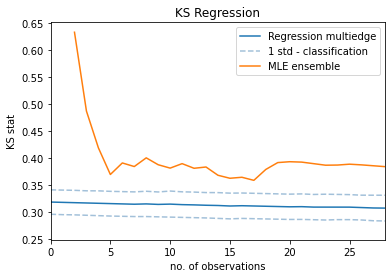

In [78]:
#edge = "WayPoint49_WayPoint50"
ks_regression_multiedge, n_regression_multiedge,std_regression_multiedge = evaluate_regression_multiedge(edge,clf=reg_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    metric = "difference",
                    cutoff = 100,max_obs = 100,n_similar = 20,
                    plot_graph = False, verbose = False,
                    random_state = seed)

cutoff = len(n_regression_multiedge)//7
plt.plot(n_regression_multiedge,ks_regression_multiedge, label = "Regression multiedge")
plt.plot(n_regression_multiedge,ks_regression_multiedge+std_regression_multiedge, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5, label = "1 std - classification")
plt.plot(n_regression_multiedge,ks_regression_multiedge-std_regression_multiedge, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5)

plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("KS Regression")

Text(0.5, 1.0, 'KS Regression')

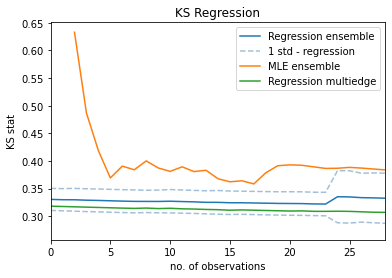

In [79]:
cutoff = len(n_regression_multiedge)//7

plt.plot(n_regression_ensemble,ks_regression_ensemble, label = "Regression ensemble")
plt.plot(n_regression_ensemble,ks_regression_ensemble+std_regression_ensemble, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5, label = "1 std - regression")
plt.plot(n_regression_ensemble,ks_regression_ensemble-std_regression_ensemble, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5)

plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.plot(n_regression_multiedge,ks_regression_multiedge, label = "Regression multiedge")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("KS Regression")

### check distributions

Similar edge: CorpLocker5_CorpLocker6
predicted ks: 0.4707904069853185
length diff: 0.5298004712792821
n_obs: 242
n_test: 201
n_train: 242
KS: 0.7544303277003412


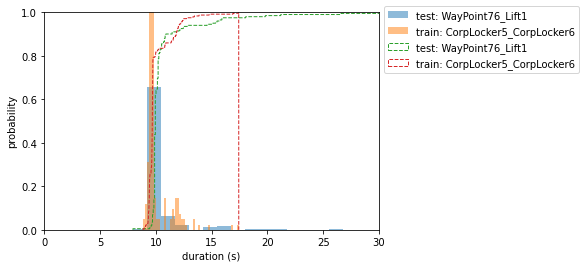

In [127]:
#edge = "WayPoint49_WayPoint50"
ks = compare_regression(edge,clf = reg_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test= "aaf_map.yaml",
                    filename_train = "tsc_map.yaml", 
                    n_similar=10,cutoff = 100,
                    metric = "difference", x_max = 30, 
                    n_bins_test = 100, n_bins_train = 50)


# 10) Threshold + Classification

## 10a) pval dataloader

In [22]:
#Train map
df_similar_diff_tsc = ks_dataloader(df_tsc_merge, filename = "tsc_map.yaml",metric = "difference",
                               threshold = 0.33,threshold_metric = "ks",
                                cutoff = 50, verbose = True, report_interval = 10000)

#ks_threshold = 0.3
#df_similar_diff_tsc["same_cluster"] = df_similar_diff_tsc["ks"] <= ks_threshold
print(len(df_similar_diff_tsc[df_similar_diff_tsc["same_cluster"]==True]))
print(len(df_similar_diff_tsc[df_similar_diff_tsc["same_cluster"]==False]))
#df_similar_diff_tsc[df_similar_diff_tsc["same_cluster"]==True]

df_similar_diff_tsc.tail(2)

10000 iterations: 25.862809658050537 secs
20000 iterations: 38.06253480911255 secs
30000 iterations: 44.61182475090027 secs
Time taken (regression_dataloader): 46.497787952423096 secs
412
8321


,edge1,edge2,n_obs1,n_obs2,ks,pval,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
8731,CorpLocker3_CorpLocker2,HospEmptySpace_HospTriangularTable1,55,50,0.46,1.52252e-05,False,0.464493,0,1,1,0.038271,2.0553
8732,CorpLocker3_CorpLocker2,HospTriangularTable2_HospTriangularTable1,55,50,0.545455,1.04251e-07,False,0.917853,1,1,2,0.038271,1.67815


In [23]:
#Test map
df_similar_diff_aaf = ks_dataloader(df_aaf_merge, filename = "aaf_map.yaml",metric = "difference",
                               threshold = 0.33,threshold_metric = "ks",
                               cutoff = 50, verbose = True, report_interval = 10000)

#ks_threshold = 0.3
#df_similar_diff_aaf["same_cluster"] = df_similar_diff_aaf["ks"] <= ks_threshold
print(len(df_similar_diff_aaf[df_similar_diff_aaf["same_cluster"]==True]))
print(len(df_similar_diff_aaf[df_similar_diff_aaf["same_cluster"]==False]))
#dfsimilar_diff_aaf[df_similar_diff_aaf["same_cluster"]==True]

df_similar_diff_aaf.tail(2)

10000 iterations: 46.39580535888672 secs
Time taken (regression_dataloader): 76.24089360237122 secs
343
8653


,edge1,edge2,n_obs1,n_obs2,ks,pval,same_cluster,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
8994,WayPoint8_WayPoint87,WayPoint45_WayPoint82,83,50,0.795663,4.44089e-16,False,0.439063,0,0,0,0.846232,1.71891
8995,WayPoint8_WayPoint87,Lift1_Teekueche,83,50,0.927711,4.44089e-16,False,2.43624,2,1,1,0.751287,1.44086


## 10b) Train Classifier

Samples drawn: 824
Samples drawn: 8996
Classifier type: gb
Accuracy: 0.7074255224544241
              precision    recall  f1-score   support

         0.0       0.99      0.70      0.82      8653
         1.0       0.10      0.79      0.17       343

    accuracy                           0.71      8996
   macro avg       0.54      0.75      0.50      8996
weighted avg       0.95      0.71      0.80      8996



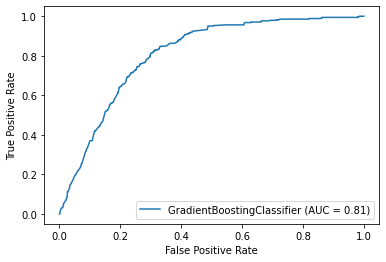

In [24]:
#point test - can choose classifier
#from ["rf", "dt", "knn", "lr", "svm",  
#      "gb", "ab", "nb", "qda"]
classifier = "gb"
clf2_tsc = classifier_pointtest(df_similar_diff_tsc, df_similar_diff_aaf,
                               features = ["edge_length_diff", "origin_connections_diff", 
                                "target_connections_diff", "total_connections_diff", 
                                "max_angle_diff", "sum_angle_diff"], 
                                target = "same_cluster",
                               classifier = classifier,balanced_train = True, balanced_test = False)

Samples drawn: 686
Samples drawn: 8733
Classifier type: gb
Accuracy: 0.45734570021756554
              precision    recall  f1-score   support

         0.0       0.99      0.43      0.60      8321
         1.0       0.07      0.91      0.14       412

    accuracy                           0.46      8733
   macro avg       0.53      0.67      0.37      8733
weighted avg       0.95      0.46      0.58      8733



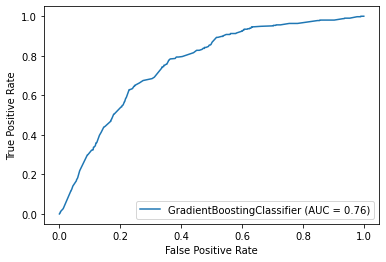

In [107]:
#TRAIN CLASSIFIER IN REVERSE
#Train on AAF, Test on TSC
#point test - can choose classifier
#from ["rf", "dt", "knn", "lr", "svm",  
#      "gb", "ab", "nb", "qda"]
classifier = "gb"
clf2_aaf = classifier_pointtest(df_similar_diff_aaf, df_similar_diff_tsc,
                               features = ["edge_length_diff", "origin_connections_diff", 
                                "target_connections_diff", "total_connections_diff", 
                                "max_angle_diff", "sum_angle_diff"], 
                                target = "same_cluster",
                               classifier = classifier,balanced_train = True, balanced_test = False)

## 10c) Choose edge & evaluate performance

In [84]:
#edge = "WayPoint49_WayPoint50"
similar_edges, df_predict = similar_classification(edge, clf = clf2_tsc, 
                           filename_test = "aaf_map.yaml", filename_train = "tsc_map.yaml", 
                           n_similar = 5)
df_predict.head(5)

,edge_test,edge_train,class_label,class0_prob,class1_prob,edge_length_diff,origin_connections_diff,target_connections_diff,total_connections_diff,max_angle_diff,sum_angle_diff
0,WayPoint76_Lift1,CorpLocker6_CorpLocker7,1.0,0.211586,0.788414,0.0905296,1,0,1,0.0190147,0.710458
1,WayPoint76_Lift1,CorpLocker7_CorpLocker6,1.0,0.216054,0.783946,0.0905296,1,0,1,0.0240263,2.56376
2,WayPoint76_Lift1,CorpLocker1_CorpLocker5,1.0,0.220345,0.779655,0.101662,0,0,0,0.350757,3.80271
3,WayPoint76_Lift1,CorpLocker6_CorpLocker5,1.0,0.229839,0.770161,0.5298,1,0,1,0.082972,0.523228
4,WayPoint76_Lift1,GlassCorridor0_GlassCorridor1,1.0,0.229839,0.770161,0.353621,1,0,1,0.307158,1.63644


Similar edge: GlassCorridor0_GlassCorridor1
length diff: 0.3536210733127376
n_obs: 62


C:\Users\pyliu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Clustering-Classifier')

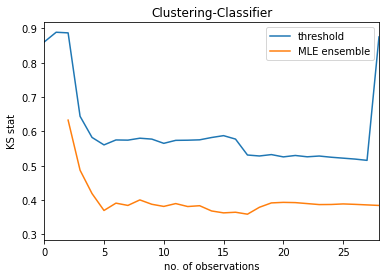

In [85]:
#edge = "WayPoint49_WayPoint50"
ks_threshold, n_threshold = evaluate_classification(edge,clf=clf_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    metric = "difference", 
                    cutoff = 100,max_obs = 100,n_similar = 10,
                    plot_graph = False, verbose = False)
cutoff = len(n_threshold)//7
plt.plot(n_threshold,ks_threshold, label = "threshold")
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Clustering-Classifier")

### ensemble

Similar edge: GlassCorridor0_GlassCorridor1
length diff: 0.3536210733127376
n_obs: 62


C:\Users\pyliu\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Time taken (evaluate_classification_ensemble): 40.94238591194153 secs


Text(0.5, 1.0, 'Clustering-Classifier')

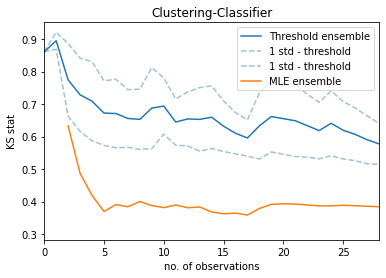

In [86]:
#edge = "WayPoint49_WayPoint50"
ks_threshold_ensemble, n_threshold_ensemble, std_threshold_ensemble = evaluate_classification_ensemble(edge,clf=clf_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    metric = "difference", n_repeats = 10,
                    cutoff = 100,max_obs = 100,n_similar = 10,
                    plot_graph = False, verbose = False,
                    random_state = seed)

cutoff = len(n_threshold_ensemble)//7
plt.plot(n_threshold_ensemble,ks_threshold_ensemble, label = "Threshold ensemble")
plt.plot(n_threshold_ensemble,ks_threshold_ensemble+std_threshold_ensemble, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5, label = "1 std - threshold")
plt.plot(n_threshold_ensemble,ks_threshold_ensemble-std_threshold_ensemble, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5, label = "1 std - threshold")

plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Clustering-Classifier")

### multiedge

Similar edges: ['GlassCorridor3_GlassCorridor2', 'CorpLocker6_CorpLocker7', 'CorpLocker7_CorpLocker6', 'SuppLocker5_SuppLocker7', 'SuppLocker7_SuppLocker5']
n_obs: [166, 174, 182, 502, 145]
Time taken (evaluate_classification_multiedge): 35.618088722229004 secs


Text(0.5, 1.0, 'Clustering-Classifier')

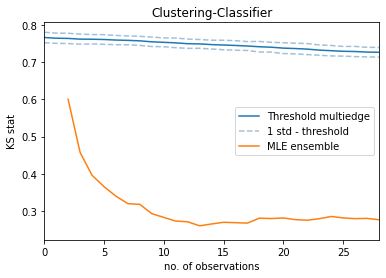

In [115]:
#edge = "WayPoint49_WayPoint50"
ks_threshold_multiedge, n_threshold_multiedge,std_threshold_multiedge = evaluate_classification_multiedge(edge,clf=clf_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test = "aaf_map.yaml",
                    filename_train = "tsc_map.yaml",
                    metric = "difference",
                    cutoff = 100,max_obs = 100,n_similar = 20,
                    plot_graph = False, verbose = False,
                    random_state = seed)

cutoff = len(n_threshold_multiedge)//7
plt.plot(n_threshold_multiedge,ks_threshold_multiedge, label = "Threshold multiedge")
plt.plot(n_threshold_multiedge,ks_threshold_multiedge+std_threshold_multiedge, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5, label = "1 std - threshold")
plt.plot(n_threshold_multiedge,ks_threshold_multiedge-std_threshold_multiedge, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5)

plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Clustering-Classifier")

Text(0.5, 1.0, 'Clustering-Classifier')

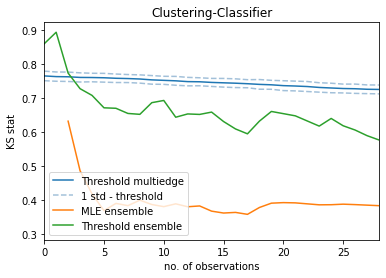

In [88]:
cutoff = len(n_threshold_multiedge)//7
plt.plot(n_threshold_multiedge,ks_threshold_multiedge, label = "Threshold multiedge")
plt.plot(n_threshold_multiedge,ks_threshold_multiedge+std_threshold_multiedge, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5, label = "1 std - threshold")
plt.plot(n_threshold_multiedge,ks_threshold_multiedge-std_threshold_multiedge, 
         linestyle = "dashed",color = "steelblue",alpha = 0.5)
plt.plot(n_mle_ensemble,ks_mle_ensemble, label = "MLE ensemble")
plt.plot(n_threshold_ensemble,ks_threshold_ensemble, label = "Threshold ensemble")

plt.xlim([0,cutoff])
plt.legend()
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title("Clustering-Classifier")

### check distributions

Similar edge: CorpLocker6_CorpLocker7
length diff: 0.09052959633793556
n_obs: 174
n_test: 201
n_train: 174
KS: 0.7625664779550523


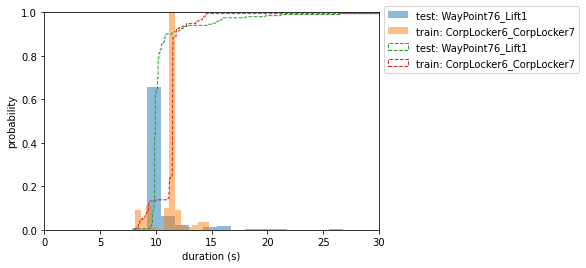

In [89]:
#edge = "WayPoint49_WayPoint50"
ks = compare_classification(edge,clf = clf2_tsc,
                    df_test = df_aaf_merge, 
                    df_train = df_tsc_merge, 
                    filename_test= "aaf_map.yaml",
                    filename_train = "tsc_map.yaml", 
                    n_similar=10,cutoff = 100,
                    metric = "difference", x_max = 30, 
                    n_bins_test = 100, n_bins_train = 50)


# 11) Compare Methods

## 11a) Single edge (online updates)

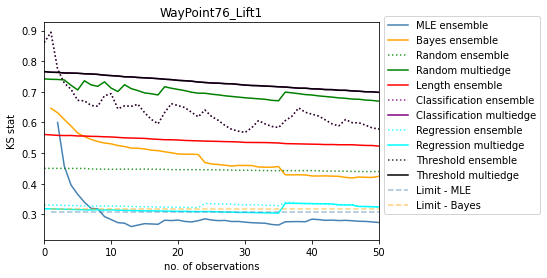

In [122]:
cutoff = len(n_mle_ensemble)//4

#comparison methods
plt.plot(n_mle_ensemble,ks_mle_ensemble, color = "steelblue",label = "MLE ensemble")
plt.plot(n_bayes_ensemble,ks_bayes_ensemble,color = "orange", label = "Bayes ensemble")
plt.plot(n_random_ensemble,ks_random_ensemble,color = "green", 
         linestyle = "dotted", alpha = 0.8, label = "Random ensemble")
plt.plot(n_random_multiedge,ks_random_multiedge,color = "green", label = "Random multiedge")
#plt.plot(n_random_ensemble,ks_random_ensemble+std_random_ensemble, 
#         color = "green",linestyle = "dashed", alpha = 0.5, label = "1 std - Random")
#plt.plot(n_random_ensemble,ks_random_ensemble-std_random_ensemble, 
#         color = "green",linestyle = "dashed", alpha = 0.5)
plt.plot(n_length_ensemble,ks_length_ensemble, color = "red", label = "Length ensemble")
plt.plot(n_classification_ensemble, ks_classification_ensemble, color = "purple",
         linestyle = "dotted", alpha = 0.8, label = "Classification ensemble")
plt.plot(n_classification_multiedge, ks_classification_multiedge, color = "purple", label = "Classification multiedge")
plt.plot(n_regression_ensemble, ks_regression_ensemble, color = "cyan",
         linestyle = "dotted", alpha = 0.8, label = "Regression ensemble")
plt.plot(n_regression_multiedge, ks_regression_multiedge, color = "cyan", label = "Regression multiedge")
plt.plot(n_threshold_ensemble, ks_threshold_ensemble, color = "black",
         linestyle = "dotted", alpha = 0.8, label = "Threshold ensemble")
plt.plot(n_threshold_multiedge, ks_threshold_multiedge, color = "black", label = "Threshold multiedge")

#limit (MLE)
min_mle = ks_mle_ensemble[-1]
lim_mle = np.zeros(len(n_mle_ensemble))
lim_mle += float(min_mle)
plt.plot(n_mle_ensemble,lim_mle, linestyle = "dashed", color = "steelblue", alpha = 0.5, label = "Limit - MLE")

#limit (Bayes)
min_bayes = ks_bayes_ensemble[-1]
lim_bayes = np.zeros(len(n_bayes_ensemble))
lim_bayes += float(min_bayes)
plt.plot(n_bayes_ensemble,lim_bayes, linestyle = "dashed", color = "orange", alpha = 0.5, label = "Limit - Bayes")

#plt formatting
plt.xlim([0,cutoff])
plt.xlabel("no. of observations")
plt.ylabel("KS stat")
plt.title(edge)
plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
plt.savefig("recent_comparemethods.png", bbox_inches = "tight", dpi = 1000)


## 11b) Starting KS for all edges

In [108]:
cutoffs = [1,10,50,100,200]
initial_ks_dict = {}
cutoff = 100

In [76]:
#random
initial_ks_random, edge_test_random, edge_prior_random = start_ks_random(df_train = df_tsc_merge,
                                                        df_test = df_aaf_merge,
                                                        filename_train = "tsc_map.yaml", 
                                                        filename_test = "aaf_map.yaml",
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_random),np.std(initial_ks_random))


0 iterations: 1.542611837387085 secs
25 iterations: 31.641801357269287 secs
50 iterations: 62.10644888877869 secs
75 iterations: 107.75427794456482 secs
100 iterations: 140.16854572296143 secs
125 iterations: 175.42943334579468 secs
150 iterations: 218.89235854148865 secs
175 iterations: 253.33152294158936 secs
200 iterations: 291.5323462486267 secs
310.3716757297516
0.7010784672826691 0.21181406385762627


In [77]:
#by length
initial_ks_length, edge_test_length, edge_prior_length = start_ks_length(df_train = df_tsc_merge,
                                                        df_test = df_aaf_merge,
                                                        filename_train = "tsc_map.yaml", 
                                                        filename_test = "aaf_map.yaml",
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_length),np.std(initial_ks_length))

0 iterations: 1.4741687774658203 secs
25 iterations: 34.85831022262573 secs
50 iterations: 78.8386538028717 secs
75 iterations: 108.27745366096497 secs
100 iterations: 136.41658473014832 secs
125 iterations: 162.43460774421692 secs
150 iterations: 200.66049361228943 secs
175 iterations: 245.03866839408875 secs
200 iterations: 284.7498617172241 secs
309.594699382782
0.5786032280963289 0.22058103293637177


In [78]:
#Clustering-Classification
initial_ks_clustering, edge_test_clustering, edge_prior_clustering = start_ks_classification(df_train = df_tsc_merge,
                                                        df_test = df_aaf_merge,
                                                        clf = clf_tsc,
                                                        filename_train = "tsc_map.yaml", 
                                                        filename_test = "aaf_map.yaml",
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_clustering),np.std(initial_ks_clustering))

0 iterations: 12.3413724899292 secs
25 iterations: 57.92748284339905 secs
50 iterations: 97.89698481559753 secs
75 iterations: 126.14254188537598 secs
100 iterations: 157.0975043773651 secs
125 iterations: 208.1897029876709 secs
150 iterations: 254.24476647377014 secs
175 iterations: 294.5115821361542 secs
200 iterations: 338.39432072639465 secs
369.1095600128174
0.6081243645463139 0.23150529840260195


In [79]:
#Regression
initial_ks_regression, edge_test_regression, edge_prior_regression = start_ks_regression(df_train = df_tsc_merge,
                                                                    df_test = df_aaf_merge,
                                                                    clf = reg_tsc,
                                                                    filename_train = "tsc_map.yaml", 
                                                                    filename_test = "aaf_map.yaml",
                                                                    cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_regression),np.std(initial_ks_regression))

0 iterations: 12.149519681930542 secs
25 iterations: 41.47256088256836 secs
50 iterations: 83.39814019203186 secs
75 iterations: 116.32170915603638 secs
100 iterations: 148.69587564468384 secs
125 iterations: 182.28263330459595 secs
150 iterations: 223.9677712917328 secs
175 iterations: 264.0300233364105 secs
200 iterations: 309.0718448162079 secs
337.27556824684143
0.6061007270781941 0.2241435764724901


In [80]:
#Threshold-Classification
initial_ks_threshold, edge_test_threshold, edge_prior_threshold = start_ks_classification(df_train = df_tsc_merge,
                                                        df_test = df_aaf_merge,
                                                        clf = clf2_tsc,
                                                        filename_train = "tsc_map.yaml", 
                                                        filename_test = "aaf_map.yaml",
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_threshold),np.std(initial_ks_threshold))

0 iterations: 12.130473852157593 secs
25 iterations: 48.44743275642395 secs
50 iterations: 83.08923768997192 secs
75 iterations: 124.02746915817261 secs
100 iterations: 154.93560934066772 secs
125 iterations: 185.336421251297 secs
150 iterations: 218.97232365608215 secs
175 iterations: 256.95209431648254 secs
200 iterations: 287.82194662094116 secs
308.47233605384827
0.6023770400076729 0.22215987929952483


In [90]:
np.sum(np.square(initial_ks_clustering))/len(np.square(initial_ks_clustering))

0.42340994594333586

In [ ]:
y_1 = [np.mean(initial_ks_random),np.mean(initial_ks_length),np.mean(initial_ks_clustering),np.mean(initial_ks_regression),np.mean(initial_ks_threshold)]
yerr_1 = [np.std(initial_ks_random),np.std(initial_ks_length),np.std(initial_ks_clustering),np.std(initial_ks_regression),np.std(initial_ks_threshold)]

In [81]:
y_10 = [np.mean(initial_ks_random),np.mean(initial_ks_length),np.mean(initial_ks_clustering),np.mean(initial_ks_regression),np.mean(initial_ks_threshold)]
yerr_10 = [np.std(initial_ks_random),np.std(initial_ks_length),np.std(initial_ks_clustering),np.std(initial_ks_regression),np.std(initial_ks_threshold)]

In [67]:
y_50 = [np.mean(initial_ks_random),np.mean(initial_ks_length),np.mean(initial_ks_clustering),np.mean(initial_ks_regression),np.mean(initial_ks_threshold)]
yerr_50 = [np.std(initial_ks_random),np.std(initial_ks_length),np.std(initial_ks_clustering),np.std(initial_ks_regression),np.std(initial_ks_threshold)]

In [52]:
y_100 = [np.mean(initial_ks_random),np.mean(initial_ks_length),np.mean(initial_ks_clustering),np.mean(initial_ks_regression),np.mean(initial_ks_threshold)]
yerr_100 = [np.std(initial_ks_random),np.std(initial_ks_length),np.std(initial_ks_clustering),np.std(initial_ks_regression),np.std(initial_ks_threshold)]

In [45]:
y_200 = [np.mean(initial_ks_random),np.mean(initial_ks_length),np.mean(initial_ks_clustering),np.mean(initial_ks_regression),np.mean(initial_ks_threshold)]
yerr_200 = [np.std(initial_ks_random),np.std(initial_ks_length),np.std(initial_ks_clustering),np.std(initial_ks_regression),np.std(initial_ks_threshold)]

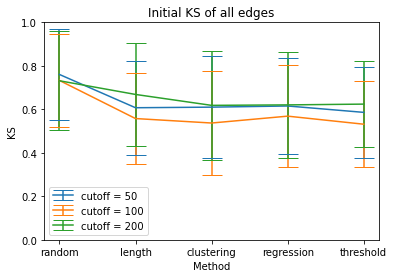

In [83]:
x = ["random", "length", "clustering", "regression", "threshold"]
#plt.errorbar(x,y_10,yerr = yerr_10, capsize = 10, label = "cutoff = 10")
plt.errorbar(x,y_50,yerr = yerr_50, capsize = 10, label = "cutoff = 50")
plt.errorbar(x,y_100,yerr = yerr_100, capsize = 10, label = "cutoff = 100")
plt.errorbar(x,y_200,yerr = yerr_200, capsize = 10, label = "cutoff = 200")
plt.xlabel("Method")
plt.ylabel("KS")
plt.title(f"Initial KS of all edges")
plt.ylim([0,1])
plt.legend()


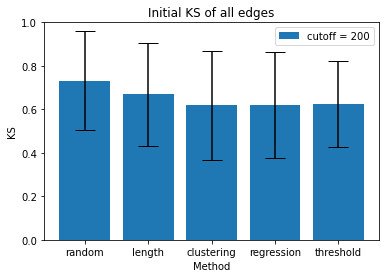

In [44]:
plt.bar(x,y_200,yerr = yerr_200, capsize = 10,label = "cutoff = 200")
plt.xlabel("Method")
plt.ylabel("KS")
plt.title(f"Initial KS of all edges")
plt.ylim([0,1])
plt.legend()


In [70]:
initial_ks_dict["x"] = x
initial_ks_dict["y_10"] = y_10
initial_ks_dict["yerr_10"] = yerr_10
initial_ks_dict["y_50"] = y_50
initial_ks_dict["yerr_50"] = yerr_50
initial_ks_dict["y_100"] = y_100
initial_ks_dict["yerr_100"] = yerr_100
initial_ks_dict["y_200"] = y_200
initial_ks_dict["yerr_200"] = yerr_200

In [71]:
initial_ks_dict

{'x': ['random', 'length', 'clustering', 'regression', 'threshold'],
 'y_50': [0.7604299450598097,
  0.6073593762370537,
  0.610082985354827,
  0.6154020854645195,
  0.5860402499971303],
 'yerr_50': [0.20758735414559962,
  0.21511264271625868,
  0.23441622711444474,
  0.22138629981535682,
  0.2109280072112614],
 'y_100': [0.7328890032817607,
  0.5576153143310072,
  0.537063062269286,
  0.5686706330860819,
  0.531593579719543],
 'yerr_100': [0.21274962226452301,
  0.21023083446556526,
  0.24101316324645833,
  0.2346281777218175,
  0.1979500147547042],
 'y_200': [0.7314345289439073,
  0.6684980127401305,
  0.618294599836125,
  0.6204528391898226,
  0.6240264555842304],
 'yerr_200': [0.22692078499989055,
  0.2388463072026443,
  0.2504368935673344,
  0.2435859335869977,
  0.19931580441173813]}

In [73]:
# Save
np.save('initial_ks_temp.npy', initial_ks_dict) 

# Load
read_dictionary = np.load('initial_ks.npy',allow_pickle='TRUE').item()



In [74]:
read_dictionary

{'x': ['random', 'length', 'clustering', 'regression', 'threshold'],
 'y_50': [0.7604299450598097,
  0.6073593762370537,
  0.610082985354827,
  0.6154020854645195,
  0.5860402499971303],
 'yerr_50': [0.20758735414559962,
  0.21511264271625868,
  0.23441622711444474,
  0.22138629981535682,
  0.2109280072112614],
 'y_100': [0.7328890032817607,
  0.5576153143310072,
  0.537063062269286,
  0.5686706330860819,
  0.531593579719543],
 'yerr_100': [0.21274962226452301,
  0.21023083446556526,
  0.24101316324645833,
  0.2346281777218175,
  0.1979500147547042],
 'y_200': [0.7314345289439073,
  0.6684980127401305,
  0.618294599836125,
  0.6204528391898226,
  0.6240264555842304],
 'yerr_200': [0.22692078499989055,
  0.2388463072026443,
  0.2504368935673344,
  0.2435859335869977,
  0.19931580441173813]}

## 11c) Reverse: Train on AAF, Test on TSC

In [108]:
initial_ks_reverse = {}
cutoff = 100

In [109]:
#random
initial_ks_random, edge_test_random, edge_prior_random = start_ks_random(df_train = df_aaf_merge,
                                                        df_test = df_tsc_merge,
                                                        filename_train = "aaf_map.yaml", 
                                                        filename_test = "tsc_map.yaml",
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_random),np.std(initial_ks_random))


0 iterations: 1.3350062370300293 secs
25 iterations: 40.53889989852905 secs
50 iterations: 147.37688946723938 secs
75 iterations: 172.49848699569702 secs
100 iterations: 183.72643113136292 secs
125 iterations: 212.30336570739746 secs
150 iterations: 233.10716462135315 secs
175 iterations: 239.59188508987427 secs
200 iterations: 283.00705337524414 secs
225 iterations: 290.80417466163635 secs
318.3429596424103
0.6736107147351219 0.25405319018911043


In [110]:
#by length
initial_ks_length, edge_test_length, edge_prior_length = start_ks_length(df_train = df_aaf_merge,
                                                        df_test = df_tsc_merge,
                                                        filename_train = "aaf_map.yaml", 
                                                        filename_test = "tsc_map.yaml",
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_length),np.std(initial_ks_length))

0 iterations: 1.2147626876831055 secs
25 iterations: 50.43151330947876 secs
50 iterations: 132.28380823135376 secs
75 iterations: 156.9988317489624 secs
100 iterations: 176.04451847076416 secs
125 iterations: 230.3440809249878 secs
150 iterations: 260.3342390060425 secs
175 iterations: 278.1659560203552 secs
200 iterations: 352.1090648174286 secs
225 iterations: 359.2013130187988 secs
373.7087650299072
0.4807381169623708 0.17165880495294006


In [111]:
#Clustering-Classification
initial_ks_clustering, edge_test_clustering, edge_prior_clustering = start_ks_classification(df_train = df_aaf_merge,
                                                        df_test = df_tsc_merge,
                                                        clf = clf_aaf,
                                                        filename_train = "aaf_map.yaml", 
                                                        filename_test = "tsc_map.yaml",
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_clustering),np.std(initial_ks_clustering))

0 iterations: 9.605267763137817 secs
25 iterations: 46.129130363464355 secs
50 iterations: 111.27685284614563 secs
75 iterations: 141.88480496406555 secs
100 iterations: 162.5457911491394 secs
125 iterations: 179.54302167892456 secs
150 iterations: 194.2480754852295 secs
175 iterations: 201.80829215049744 secs
200 iterations: 249.40640687942505 secs
225 iterations: 254.92214274406433 secs
269.49068236351013
0.45891725802680366 0.19508922390131728


In [112]:
#Regression
initial_ks_regression, edge_test_regression, edge_prior_regression = start_ks_regression(df_train = df_aaf_merge,
                                                                    df_test = df_tsc_merge,
                                                                    clf = reg_aaf,
                                                                    filename_train = "aaf_map.yaml", 
                                                                    filename_test = "tsc_map.yaml",
                                                                    cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_regression),np.std(initial_ks_regression))

0 iterations: 9.581389904022217 secs
25 iterations: 39.767590045928955 secs
50 iterations: 100.03693509101868 secs
75 iterations: 114.09931087493896 secs
100 iterations: 129.00324416160583 secs
125 iterations: 172.1086893081665 secs
150 iterations: 199.8947467803955 secs
175 iterations: 227.47685623168945 secs
200 iterations: 291.2621703147888 secs
225 iterations: 301.78697061538696 secs
327.31304264068604
0.5334724913108112 0.21403377453456504


In [113]:
#Threshold-Classification
initial_ks_threshold, edge_test_threshold, edge_prior_threshold = start_ks_classification(df_train = df_aaf_merge,
                                                        df_test = df_tsc_merge,
                                                        clf = clf2_aaf,
                                                        filename_train = "aaf_map.yaml", 
                                                        filename_test = "tsc_map.yaml",
                                                        cutoff = cutoff, verbose = True)
print(np.mean(initial_ks_threshold),np.std(initial_ks_threshold))

0 iterations: 9.582306385040283 secs
25 iterations: 43.03495669364929 secs
50 iterations: 117.80298233032227 secs
75 iterations: 129.77932381629944 secs
100 iterations: 146.87015843391418 secs
125 iterations: 169.06158304214478 secs
150 iterations: 196.08593559265137 secs
175 iterations: 201.97121810913086 secs
200 iterations: 274.87811756134033 secs
225 iterations: 284.00768637657166 secs
298.412150144577
0.49558065185858485 0.1896743548795316


In [115]:
y_100_reverse = [np.mean(initial_ks_random),np.mean(initial_ks_length),np.mean(initial_ks_clustering),np.mean(initial_ks_regression),np.mean(initial_ks_threshold)]
yerr_100_reverse = [np.std(initial_ks_random),np.std(initial_ks_length),np.std(initial_ks_clustering),np.std(initial_ks_regression),np.std(initial_ks_threshold)]

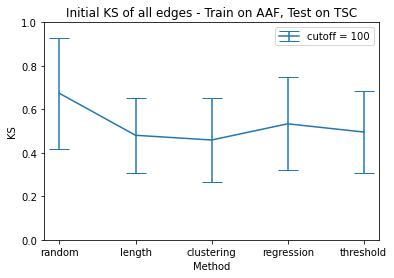

In [116]:
x = ["random", "length", "clustering", "regression", "threshold"]
#plt.errorbar(x,y_10,yerr = yerr_10, capsize = 10, label = "cutoff = 10")
#plt.errorbar(x,y_50,yerr = yerr_50, capsize = 10, label = "cutoff = 50")
plt.errorbar(x,y_100_reverse,yerr = yerr_100_reverse, capsize = 10, label = "cutoff = 100")
#plt.errorbar(x,y_200,yerr = yerr_200, capsize = 10, label = "cutoff = 200")
plt.xlabel("Method")
plt.ylabel("KS")
plt.title(f"Initial KS of all edges - Train on AAF, Test on TSC")
plt.ylim([0,1])
plt.legend()


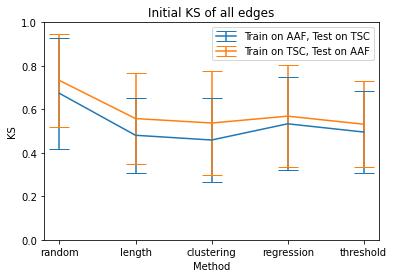

In [117]:
x = ["random", "length", "clustering", "regression", "threshold"]
#plt.errorbar(x,y_10,yerr = yerr_10, capsize = 10, label = "cutoff = 10")
#plt.errorbar(x,y_50,yerr = yerr_50, capsize = 10, label = "cutoff = 50")
plt.errorbar(x,y_100_reverse,yerr = yerr_100_reverse, capsize = 10, label = "Train on AAF, Test on TSC")
plt.errorbar(x,y_100,yerr = yerr_100, capsize = 10, label = "Train on TSC, Test on AAF")
#plt.errorbar(x,y_200,yerr = yerr_200, capsize = 10, label = "cutoff = 200")
plt.xlabel("Method")
plt.ylabel("KS")
plt.title("Initial KS of all edges")
plt.ylim([0,1])
plt.legend()